In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from collections import Counter
from sklearn import metrics
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_final.csv to df_final.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['df_final.csv']))

In [ ]:
df_final = pd.read_csv('df_final.csv',low_memory = False)

In [ ]:
df_final = df_final.drop('Unnamed: 0', axis = 1).reset_index(drop = True)
df_final

Q1  Q2  Q4  Q6  Q8  Q11  Q15  Q38  Q7_Part_1  Q7_Part_2  ...  \
0       3   0   3   4   9    2    0    2          1          1  ...   
1       4   0   0   1  10    2    7    1          0          0  ...   
2       3   0   3   4   9    0    4    4          1          0  ...   
3       3   0   3   3   9    2    8    4          1          0  ...   
4       3   0   0   5   9    2    8    4          1          1  ...   
...    ..  ..  ..  ..  ..  ...  ...  ...        ...        ...  ...   
13189   0   0   3   3   9    2    8    4          0          0  ...   
13190   0   0   6   3   9    2    8    4          0          0  ...   
13191   3   0   3   5   9    2    7    4          1          0  ...   
13192   1   0   0   3   9    0    0    4          1          0  ...   
13193   1   0   3   5   9    0    8    4          1          0  ...   

       Q36_Part_2  Q36_Part_3  Q36_Part_4  Q36_Part_5  Q36_Part_6  Q36_Part_7  \
0               0           0           1           0           0           0   
1               0           0           0           0           0           0   
2               0           0           0           0           0           0   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
13189           0           0           0           0           0           0   
13190           0           0           0           0           0           0   
13191           0           0           0           0           0           0   
13192           0           0           0           0           0           0   
13193           0           0           0           0           0           0   

       Q36_Part_8  Q36_Part_9  Q36_OTHER  target  
0               0           0          0       3  
1               0           0          0       9  
2               0           1          0       4  
3               0           0          0       9  
4               0           0          0       2  
...           ...         ...        ...     ...  
13189           0           0          0       4  
13190           0           0          0       4  
13191           0           0          0       8  
13192           0           0          0       9  
13193           0           0          0       5  

[13194 rows x 218 columns]

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.7 MB/s eta 0:00:00


# **Random Forest**

In [ ]:
X = df_final.drop('target', axis = 1)
y = df_final.target

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=1200,stratify = y)
print(X_train.shape , X_test.shape)

(9235, 217) (3959, 217)


In [ ]:
clf0= RandomForestClassifier(n_estimators=100,random_state=1200)
clf0.fit(X_train,Y_train)
std = np.std([tree.feature_importances_ for tree in clf0.estimators_], axis=0)
feature_importances = pd.Series(clf0.feature_importances_, index=X_train.columns)
print('Score of RF model on test split\n',clf0.score(X_test,Y_test))

Score of RF model on test split
 0.425359939378631


**Feature importance plot**

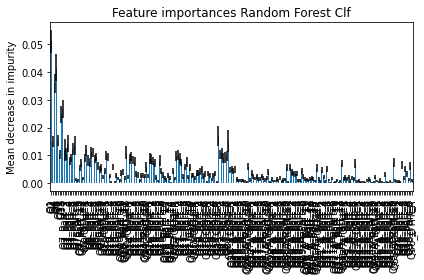

In [ ]:
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances Random Forest Clf")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# **Gradient Boosting Tree**

In [ ]:
clf= GradientBoostingClassifier(n_estimators=100,random_state=1200)
clf.fit(X_train,Y_train)

feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)

print('Score of Gradient Boosting model on test split\n',clf.score(X_test,Y_test))

Score of Gradient Boosting model on test split
 0.44354635008840615


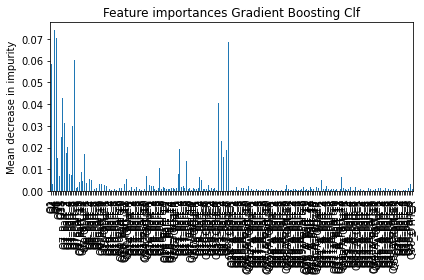

In [ ]:
fig, ax = plt.subplots()
feature_importances.plot.bar(ax=ax)
ax.set_title("Feature importances Gradient Boosting Clf")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

**Feature Selection Using Feature Importance**

In this we will use the feature importance returned by aboved tree models to select important features based on given threshold for feature importance and all features below that threshold are discarded.

In [ ]:
#Feature selecting for Random Forest Classifier Fitted Model
model0 = SelectFromModel(clf0, prefit=True) #we set prefit true since we are passing a fitted model as parameter
X_train_new = model0.transform(X_train)   #drops unimportant features

print('Shape of transformed Train set:',X_train_new.shape)
feature_names = X_train.columns[model0.get_support()]
print('Feature Names \n',feature_names)

Shape of transformed Train set: (9235, 72)
Feature Names 
 Index(['Q1', 'Q2', 'Q4', 'Q6', 'Q8', 'Q11', 'Q15', 'Q38', 'Q7_Part_1',
       'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6',
       'Q7_Part_7', 'Q7_Part_10', 'Q7_Part_11', 'Q7_OTHER', 'Q9_Part_1',
       'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6',
       'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9', 'Q9_Part_10', 'Q10_Part_1',
       'Q10_Part_2', 'Q10_Part_5', 'Q10_Part_13', 'Q14_Part_1', 'Q14_Part_2',
       'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_11', 'Q16_Part_1', 'Q16_Part_2',
       'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_7', 'Q17_Part_1', 'Q17_Part_2',
       'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_9',
       'Q18_Part_4', 'Q23_Part_1', 'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4',
       'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7', 'Q23_OTHER', 'Q26_A_Part_1',
       'Q26_A_Part_3', 'Q26_A_Part_11', 'Q28_A_Part_10', 'Q29_A_Part_1',
       'Q29_A_Part_17', 'Q31_A_Part_2', '

In [ ]:
X_test_new = X_test[['Q1', 'Q2', 'Q4', 'Q6', 'Q8', 'Q11', 'Q15', 'Q38', 'Q7_Part_1',
       'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6',
       'Q7_Part_7', 'Q7_Part_10', 'Q7_Part_11', 'Q7_OTHER', 'Q9_Part_1',
       'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6',
       'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9', 'Q9_Part_10', 'Q10_Part_1',
       'Q10_Part_2', 'Q10_Part_5', 'Q10_Part_13', 'Q14_Part_1', 'Q14_Part_2',
       'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_11', 'Q16_Part_1', 'Q16_Part_2',
       'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_7', 'Q17_Part_1', 'Q17_Part_2',
       'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_9',
       'Q18_Part_4', 'Q23_Part_1', 'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4',
       'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7', 'Q23_OTHER', 'Q26_A_Part_1',
       'Q26_A_Part_3', 'Q26_A_Part_11', 'Q28_A_Part_10', 'Q29_A_Part_1',
       'Q29_A_Part_17', 'Q31_A_Part_2', 'Q31_A_Part_5', 'Q31_A_Part_14',
       'Q33_A_Part_7', 'Q35_A_Part_10', 'Q36_Part_4', 'Q36_Part_6',
       'Q36_Part_9']]

In [ ]:
clf0_modified= RandomForestClassifier(n_estimators=100,random_state=1200)
clf0_modified.fit(X_train_new,Y_train)

RandomForestClassifier(random_state=1200)

In [ ]:
clf0_modified.score(X_test_new,Y_test)

0.4200555695882799

There is very slight improvement(43%) after feature selection

In [ ]:

#Feature selecting for Gradient Boosting Classifier Fitted Model
model0 = SelectFromModel(clf, prefit=True) #we set prefit true since we are passing a fitted model as parameter
X_train_new = model0.transform(X_train)   #drops unimportant features

print('Shape of transformed Train set:',X_train_new.shape)
feature_names = X_train.columns[model0.get_support()]
print('Feature Names \n',feature_names)

Shape of transformed Train set: (9235, 37)
Feature Names 
 Index(['Q1', 'Q4', 'Q6', 'Q8', 'Q11', 'Q15', 'Q38', 'Q7_Part_1', 'Q7_Part_2',
       'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7',
       'Q7_Part_11', 'Q7_OTHER', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q10_Part_13', 'Q14_Part_11', 'Q16_Part_7', 'Q17_Part_2',
       'Q17_Part_3', 'Q17_Part_7', 'Q18_Part_3', 'Q18_Part_4', 'Q23_Part_1',
       'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6',
       'Q23_Part_7', 'Q31_A_Part_2', 'Q31_A_Part_14'],
      dtype='object')


In [ ]:
X_test_new = X_test[['Q1', 'Q4', 'Q6', 'Q8', 'Q11', 'Q15', 'Q38', 'Q7_Part_1', 'Q7_Part_2',
       'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7',
       'Q7_Part_11', 'Q7_OTHER', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q10_Part_13', 'Q14_Part_11', 'Q16_Part_7', 'Q17_Part_2',
       'Q17_Part_3', 'Q17_Part_7', 'Q18_Part_3', 'Q18_Part_4', 'Q23_Part_1',
       'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6',
       'Q23_Part_7', 'Q31_A_Part_2', 'Q31_A_Part_14']] #dropping unnecessary features
clf_modified= GradientBoostingClassifier(n_estimators=100,random_state=1200)
clf_modified.fit(X_train_new,Y_train)

GradientBoostingClassifier(random_state=1200)

In [ ]:
clf_modified.score(X_test_new,Y_test)

0.44960848699166456

There is no improvement after feature selection

In [ ]:
import shap
# creating an explainer for our model
explainer = shap.TreeExplainer(clf0) # we only need to pass our  fitted model to tree explainer. 
                                    #No background dataset in 'data' argument required for tree models as it
                                    #is automatically received through the model tree object.

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_train)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: [0.06018517 0.0096091  0.1118863  0.03348782 0.25848944 0.08182241
 0.1323346  0.05207038 0.08906984 0.14897997 0.02206497]


In [ ]:
# Shap Values for class =0 that is Business Analyst
print("Shap Values for 'Business Analyst' class 0")
pd.DataFrame(shap_values[0],columns=X_train.columns).head()

Shap Values for 'Business Analyst' class 0


Q1        Q2        Q4        Q6        Q8       Q11       Q15  \
0  0.005044 -0.000248  0.001888  0.021906 -0.001670  0.000442  0.003327   
1 -0.000194  0.000642 -0.000263 -0.006846 -0.001033  0.000613 -0.010693   
2  0.005050 -0.000731 -0.000419 -0.007719  0.000996  0.001812 -0.019753   
3  0.003974  0.000651 -0.002456 -0.002972 -0.000298  0.000524 -0.004900   
4  0.001679  0.000317 -0.006142 -0.004439 -0.000644 -0.001423 -0.007450   

        Q38  Q7_Part_1  Q7_Part_2  ...  Q36_Part_1  Q36_Part_2    Q36_Part_3  \
0 -0.001964  -0.010077  -0.000335  ...   -0.000007    0.000032 -1.071762e-04   
1 -0.003945  -0.002950  -0.002328  ...   -0.000009    0.000028  1.550981e-06   
2  0.011810   0.005696  -0.001897  ...   -0.000083    0.000034  5.961801e-07   
3 -0.005069  -0.002005   0.000670  ...   -0.000001    0.000029  4.258394e-06   
4  0.008365  -0.001553  -0.000665  ...   -0.000003    0.000050 -1.557977e-04   

   Q36_Part_4  Q36_Part_5  Q36_Part_6  Q36_Part_7  Q36_Part_8    Q36_Part_9  \
0   -0.000215    0.000064    0.000037    0.000051    0.000004 -2.704122e-04   
1    0.000626    0.000063    0.000008    0.000322   -0.000028  4.127803e-07   
2    0.000411    0.000249   -0.000343    0.000124   -0.000204  3.676057e-04   
3    0.000688   -0.000393   -0.000240    0.000111   -0.000151 -2.807870e-04   
4   -0.000376   -0.000477   -0.000023   -0.000297   -0.000010 -1.358127e-04   

   Q36_OTHER  
0   0.000021  
1   0.000023  
2  -0.000010  
3  -0.000357  
4   0.000015  

[5 rows x 217 columns]

## **SHAP Summary Plot**

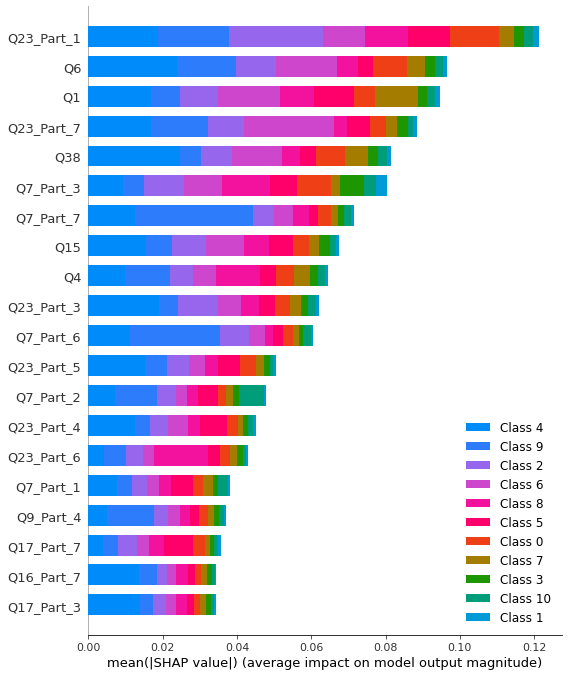

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

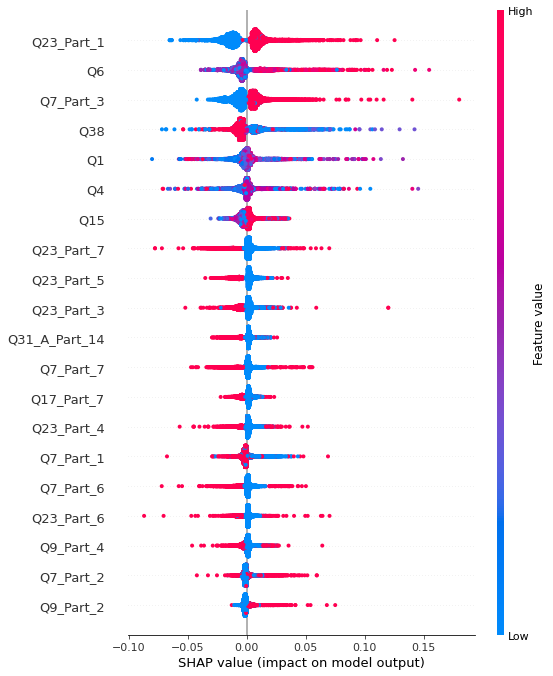

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[0], X_train)

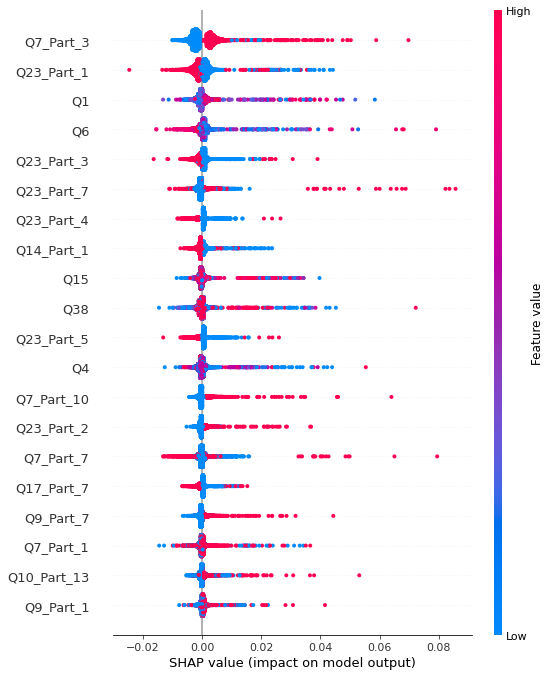

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[1], X_train)

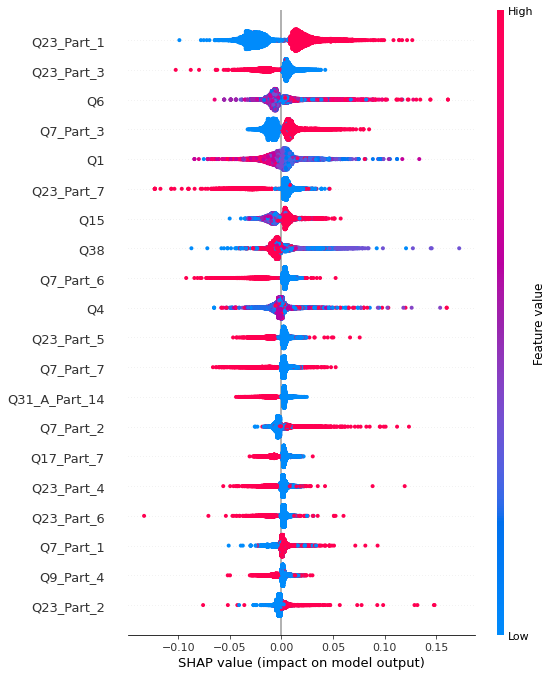

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[2], X_train)

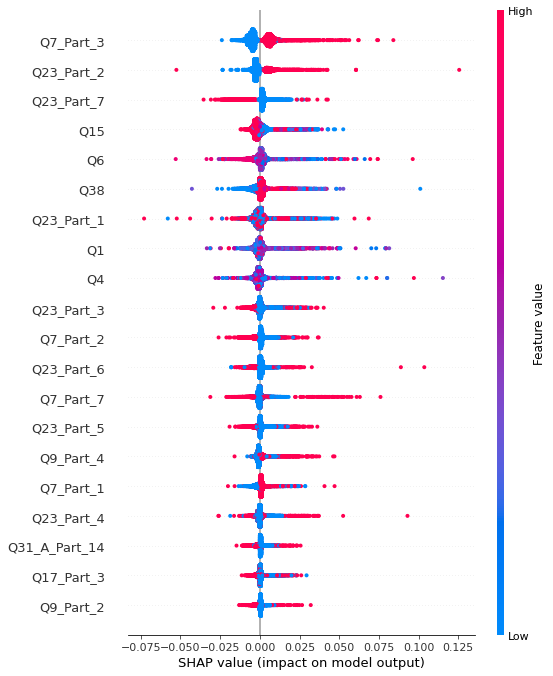

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[3], X_train)

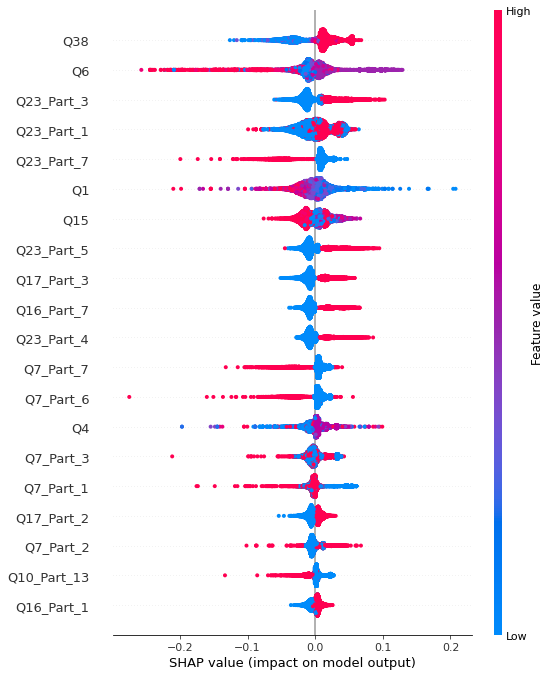

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[4], X_train)

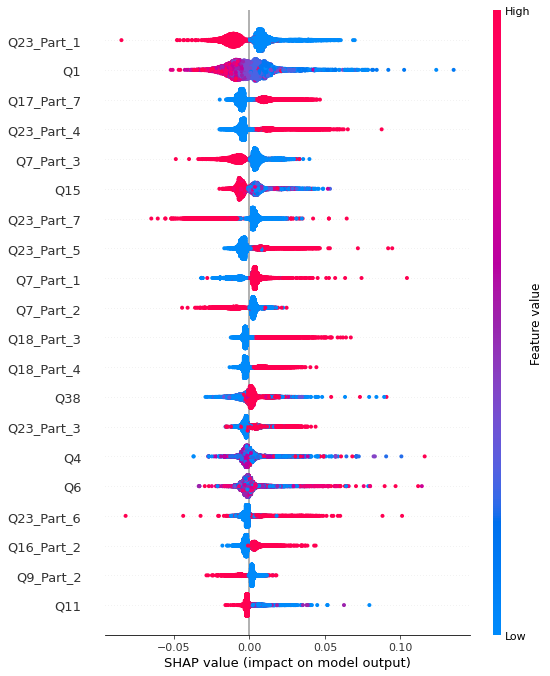

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[5], X_train)

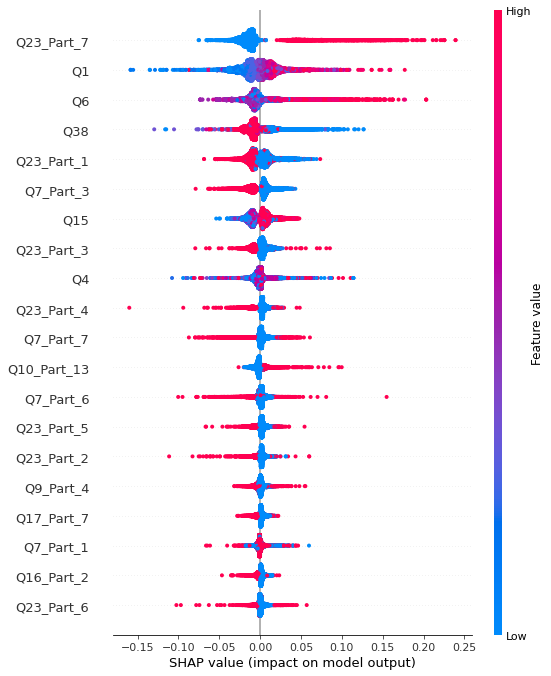

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[6], X_train)

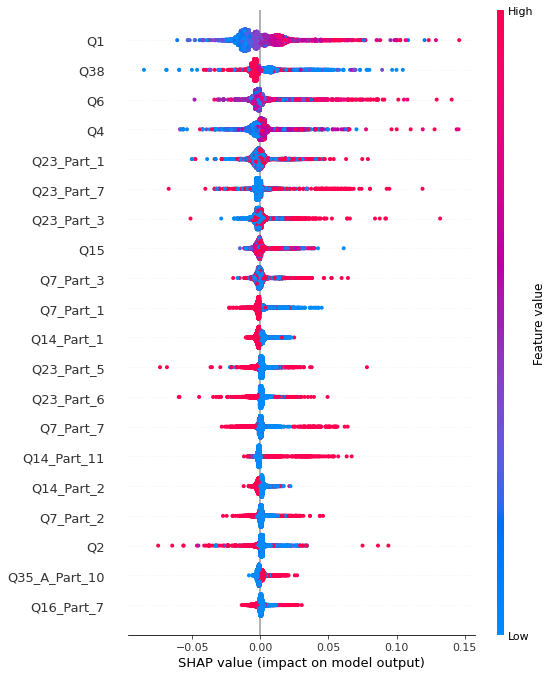

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[7], X_train)

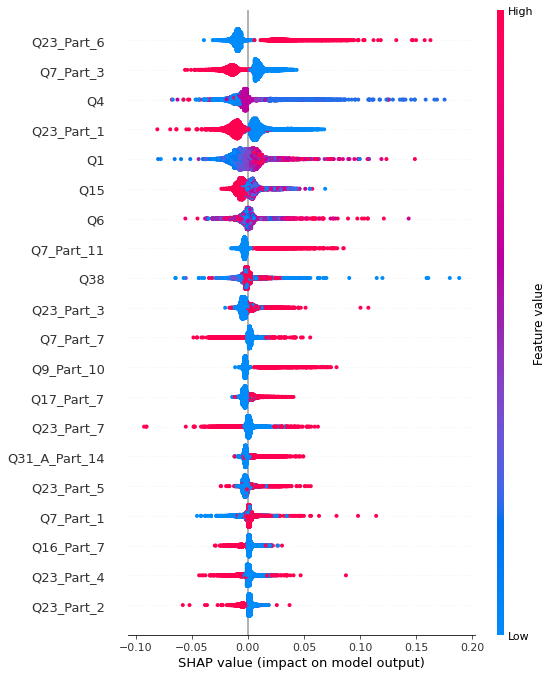

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[8], X_train)

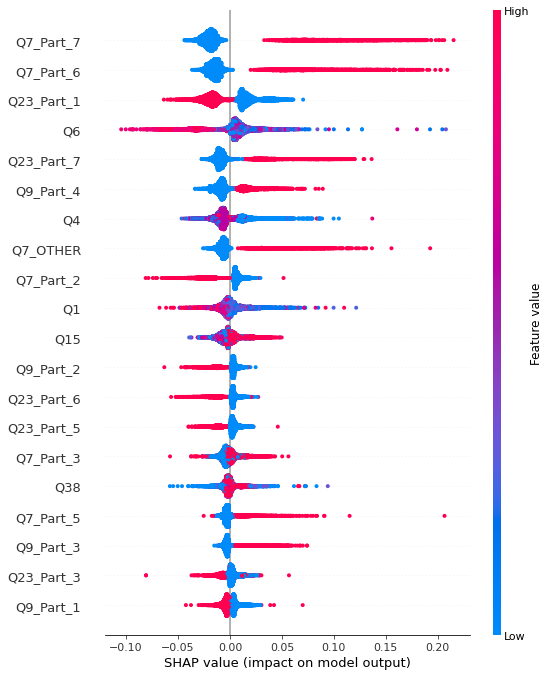

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[9], X_train)

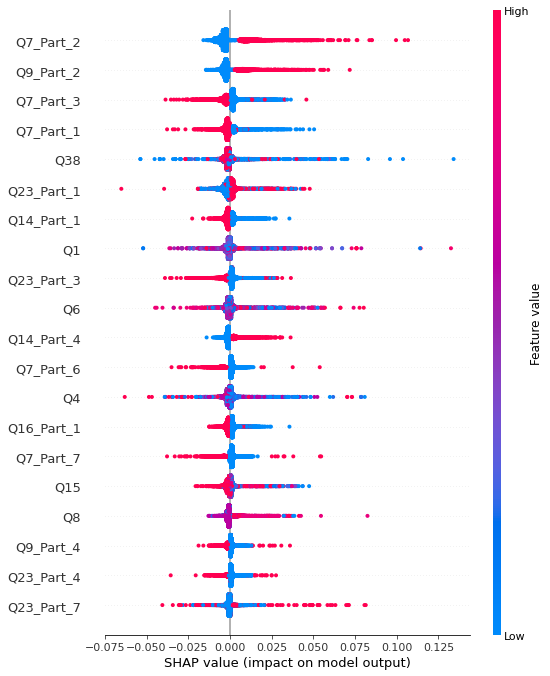

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[10], X_train)

**SHAP Values for Test Set**

In [ ]:
# creating an explainer for our model
explainer = shap.TreeExplainer(clf0)

# finding out the shap values using the explainer
shap_values_test = explainer.shap_values(X_test)

In [ ]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values_test[0][3,:], X_test.iloc[3,:])

NameError: ignored

In [ ]:
import xgboost
import  shap
shap.initjs()

X = df_varthres
y = df_final.target

model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
import xgboost
import  shap
shap.initjs()

X = df_final.drop('target', axis = 1)
y = df_final.target

model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X)

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.summary_plot(shap_values, X)

In [ ]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X.iloc[:2000,:])

In [ ]:
shap.summary_plot(shap_interaction_values, X.iloc[:2000,:])